In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import pathlib
import os

In [8]:
#nb_path = pathlib.Path().resolve()
data_path = r'C:\Users\roseh\Desktop\NYBG_R\data\dandan\Output_dataframe'

In [9]:
df = pd.read_csv(os.path.join(data_path,'NYBG_Carbon_fluxes.csv'))

In [11]:
df['type'] = df['Label'].str[-3:-1]

In [17]:
df.head()

,Unnamed: 0,Date,DT_R,DT_NEE,Label,Res,NEE,NEE1,NEE2,GEE,PAR,Soil temperature,Soil_moist,type
0,0,20220523,[],[],BW_TP1,NaN,NaN,NaN,NaN,NaN,NaN,19.5,43.7,TP
1,1,20220523,[],[],BW_TP2,NaN,NaN,NaN,NaN,NaN,NaN,20.3,36.8,TP
2,2,20220523,[],[],BW_TP3,NaN,NaN,NaN,NaN,NaN,NaN,21.3,55.1,TP
3,3,20220523,[],[],BW_TP4,NaN,NaN,NaN,NaN,NaN,NaN,21.0,45.4,TP
4,4,20220523,[],[],BT_FE1,NaN,NaN,NaN,NaN,NaN,NaN,17.8,52.2,FE


In [14]:
grouped = df.groupby('type')

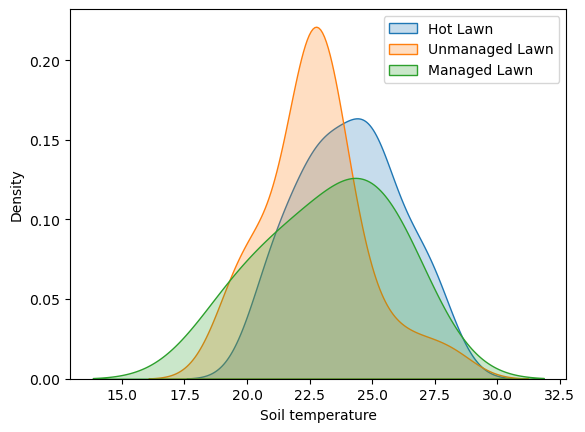

In [53]:
fig, ax = plt.subplots()

for lawn_type in ['HL','UL','ML']:
    group = grouped.get_group(lawn_type)
    sns.kdeplot(group['Soil temperature'], ax=ax, shade=True, bw_adjust=1)
    
plt.legend(['Hot Lawn','Unmanaged Lawn','Managed Lawn'])

plt.show()

In [34]:
# recategorize all Hot Lawn as Managed Lawn
df_recat = df.replace('HL','ML')

In [36]:
grouped_recat = df_recat.groupby('type')

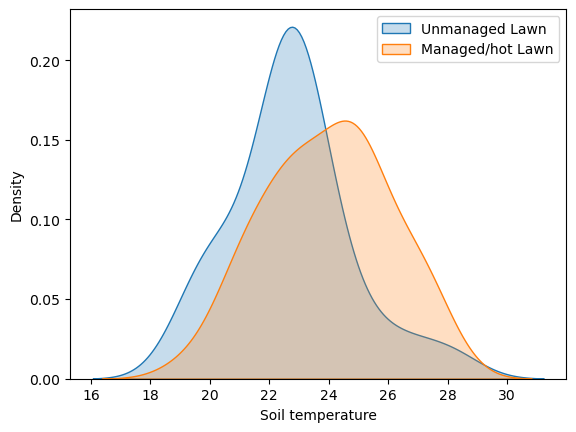

In [54]:
fig, ax = plt.subplots()

for lawn_type in ['UL','ML']:
    group = grouped_recat.get_group(lawn_type)
    sns.kdeplot(group['Soil temperature'], ax=ax,shade=True, bw_adjust=1)
    
plt.legend(['Unmanaged Lawn','Managed/hot Lawn'])

plt.show()

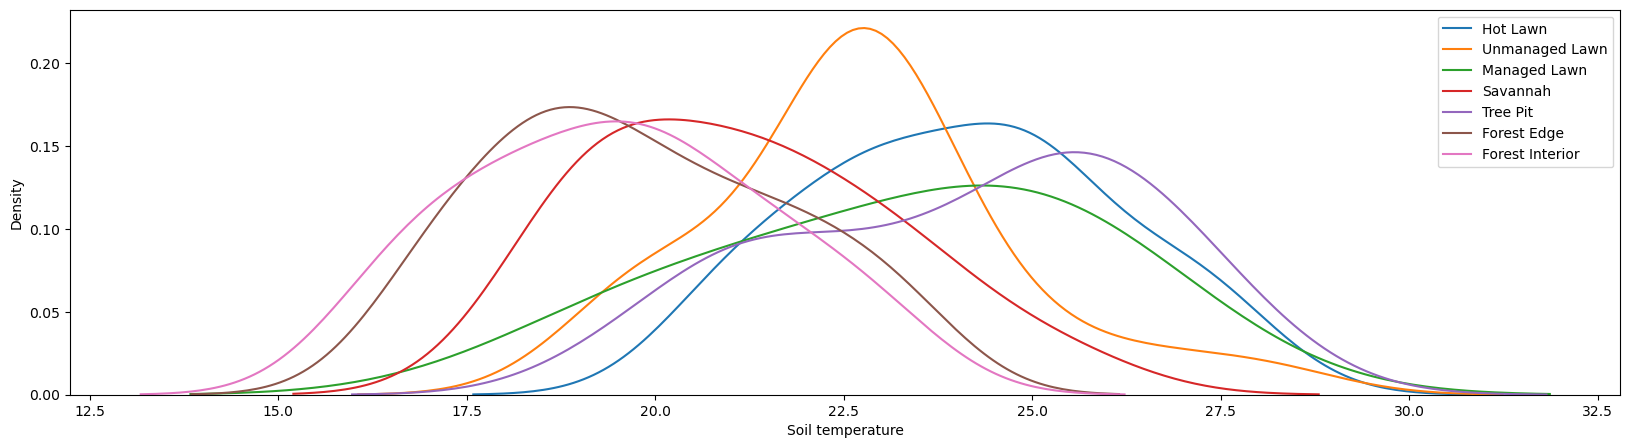

In [58]:
fig, ax = plt.subplots(figsize=(20,5))

for lawn_type in ['HL','UL','ML', 'SV', 'TP', 'FE', 'FI']:
    group = grouped.get_group(lawn_type)
    sns.kdeplot(group['Soil temperature'], ax=ax,bw_adjust=1)
    
plt.legend(['Hot Lawn','Unmanaged Lawn','Managed Lawn', 'Savannah', 'Tree Pit', 'Forest Edge', 'Forest Interior'])

plt.show()